In [212]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Resolução de problema 2 - Como medir o risco no mercado de ações?

Uma medida do risco ou volatilidade de uma ação individual é o desvio padrão do retorno total (apreciação do capital mais dividendos) ao longo de diversos períodos de tempo. Embora o desvio padrão seja fácil de calcular, ele não leva em conta até que ponto o preço de uma determinada ação varia em função de um índice de mercado padrão.

Como resultado, muitos analistas financeiros preferem utilizar outra medida de risco, conhecida como beta, do  modelo  CAPM.  Os  betas  para  ações  individuais  são  determinados  por  regressão  linear  simples.  A variável dependente (efeito) é o retorno total do excedente da ação e a variável independente (causa) é o retorno total do excedente do mercado de ações*.

Neste  estudo  de  caso,  utilizaremos  o  ativo  B3SA3  como  a  medida  do  rendimento  total  do  mercado  de ações, e a equação de regressão estimada será desenvolvida, utilizando dados diários. O beta para a ação é a inclinação da equação de regressão estimada (Beta1).

Os dados contidos no arquivo denominado Atividade1 fornecem o retorno simples de diversas ações com base no fechamento diário delas. 

O valor de referência do beta para o mercado de ações será sempre 1. Assim, para saber se um ativo é mais ou menos volátil que o mercado medido pelo ativo B3SA3, basta verificar se o beta é maior ou menor do que 1.


**a.    (1 ponto) Construa um diagrama de dispersão que compare a oscilação do ativo designado para o seu grupo em relação ao ativo B3SA3. Analise-o.**

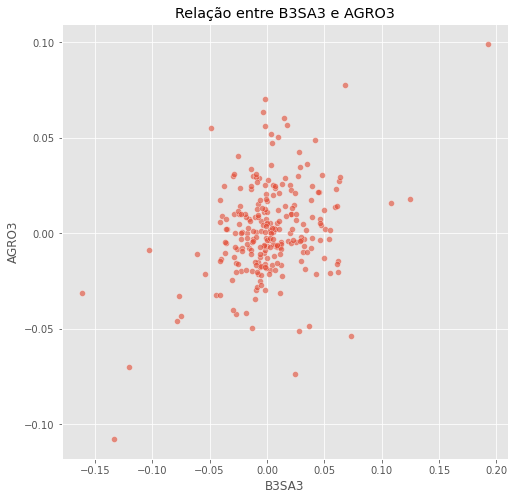

In [213]:
dados = pd.read_excel('Atividade2_4A.xlsx')
dados = dados[['B3SA3', 'AGRO3']]
x = dados.loc[:,'B3SA3']
y = dados.loc[:,'AGRO3']

plt.style.use('ggplot')

_ = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='B3SA3', 
                y="AGRO3",
                alpha = 0.6,
                data=dados,)
_ = plt.title('Relação entre B3SA3 e AGRO3')
_ = plt.xlabel('B3SA3')
_ = plt.ylabel('AGRO3')

plt.show()

Os dois ativos aparentam ter uma baixa relação positiva. Quando um dois ativos oscila num valor absoluto proximo de 0.1, é possível ver o impacto no outro ativo.

**b. (1 ponto) Encontre a correlação referente aos retornos do item anterior e analise-a.**

In [214]:
cor = np.corrcoef(x, y)[0, 1]
print(cor)

0.35374227415854204


A correlação entre os dois ativos é, de fato, baixa. Apresentando um valor de **0.35**.

**c.    (4  pontos)  Encontre  o  valor  do  beta  para  o  ativo  designado  para  o  seu  grupo  em  relação  ao  ativo B3SA3. Teste todas as hipóteses e escreva a equação final.**

In [221]:
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

x = np.array(dados['B3SA3']).reshape((-1,1))
y = np.array(dados['AGRO3'])

modelo = LinearRegression().fit(x, y)
print('Beta =', np.round(modelo.coef_[0], 2))

def linear(alpha=0.05):
  modelo = ols('AGRO3 ~ B3SA3', data=dados)
  resumo = modelo.fit()

  if (resumo.pvalues[1] >= alpha):
     print("Não há relação entre x e y,", "y =", np.round(np.mean(y),2), "\n")
  else:
    if (resumo.pvalues[0] >= alpha):
      modelo = ols('AGRO3 ~ B3SA3 - 1', data=dados)
      resumo = modelo.fit()
      print("A equação é: y =", resumo.params[0], "* x\n")
    else:
      print("A equação (1) é: y =", resumo.params[0],
          "+", resumo.params[1], "* x\n")
      print("Ou a equação (2) é: y =", np.mean(y),
          "+", resumo.params[1], "*(x -",  np.mean(x), ")\n")
linear()

Beta = 0.24
A equação é: y = 0.2457944979762463 * x



O valor de beta para AGRO3 em relação ao ativo B3SA3 é de 0.24. E a equação final é y = 0.2457944979762463 * x

**d.    (1 ponto) Em porcentagem, o ativo designado para o seu grupo, em 2020, foi quanto mais ou menos volátil do que o ativo B3SA3, em média? Explique com base na reta de regressão.**

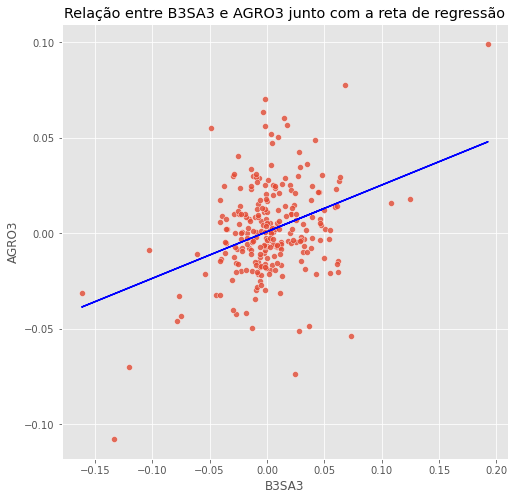

In [238]:
y_pred = modelo.predict(x)

plt.style.use('ggplot')

_ = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='B3SA3', 
                y="AGRO3",
                alpha = 0.8,
                data=dados)
_ = plt.title('Relação entre B3SA3 e AGRO3 junto com a reta de regressão')
_ = plt.xlabel('B3SA3')
_ = plt.ylabel('AGRO3')

_ = plt.plot(x, y_pred, color='blue')
plt.show()

In [242]:
desvio_B3SA3 = np.std(dados['B3SA3']) # 0.035622859529950195
desvio_AGRO3 = np.std(dados['AGRO3']) # 0.024604538453957703

volatilidade = (100 * np.mean(desvio_AGRO3)) / np.mean(desvio_B3SA3)

print(volatilidade)

69.06952102840383


O ativo AGRO3 foi 69% menos volátil em relação ao ativo B3SA3. Pela reta de regressão podemos observar que o ativo B3SA3 varia entre aproximadamente -0.15 e 0.2, equanto o ativo AGRO3 varia menos, de -0.04 à 0.05.

**e.    (2 pontos) Interprete a equação final de regressão. O que o intervalo de confiança do beta representa? O que significa o valor 1 estar contido no intervalo?**

In [336]:
modelo = ols('AGRO3 ~ B3SA3', data=dados)
resumo = modelo.fit()
detalhes = resumo.summary().tables[1]
print(detalhes)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0009      0.001      0.604      0.546      -0.002       0.004
B3SA3          0.2443      0.041      5.944      0.000       0.163       0.325


Se o coeficiente angular, digamos b1 = 1, teríamos o cenário de estabidade.

Representacao de beta:
Intervalos de confiança são usados para indicar a confiabilidade de uma estimativa, indicando o grau de incerteza frente aos calculos efetuados

No nosso caso o valor estimado para AGRO3 é de 0.0009, sendo que este valor pode variar entre -0.0020 e 0.0038 que são os valores contidos na matriz de confianca de 95%

0.2443 indica o crescimento médio do ativo AGRO3 em razao do ativo B3SA3, quando aumenta em uma unidade, que pode ser qualquer valor entre  0.1634 e  0.3253 com 95% de confiança.

**f.(1 ponto) O que você mudaria/acrescentaria na resposta do item (d), com base na análise do item (e)? Explique.**

Acrescentaria na resposta os indicativos de crescimento medio assim como o intervalo de confianca, com o intuito de melhorar a explicacao com base na reta de regressão, tornando a estimativa mais fundamentada.